# Project McNulty

## Attribute Information:

      -- 1. #3  (age)       age in years
      -- 2. #4  (sex)       sex (1 = male; 0 = female)
      -- 3. #9  (cp)        chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
      -- 4. #10 (trestbps)  resting blood pressure (in mm Hg on admission to the hospital)
      -- 5. #12 (chol)      serum cholestoral in mg/dl
      -- 6. #16 (fbs)       fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
      -- 7. #19 (restecg)   resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
      -- 8. #32 (thalach)   maximum heart rate achieved
      -- 9. #38 (exang)     exercise induced angina (1 = yes; 0 = no)
      -- 10. #40 (oldpeak)  ST depression induced by exercise relative to rest
      -- 11. #41 (slope)    the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
      -- 12. #44 (ca)       number of major vessels (0-3) colored by flourosopy
      -- 13. #51 (thal)     3 = normal; 6 = fixed defect; 7 = reversable defect
      -- 14. #58 (num)      diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels)
     

In [1]:
import pymysql
import credentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

db = pymysql.connect(host="localhost",
                     user=credentials.user,
                     passwd=credentials.password,
                     db='heart_disease')

sql = "SELECT * FROM master_patients;"

df = pd.read_sql(sql, db)

columns = ['patient_id','hospital_id','age','sex','chest_pain_type','resting_blood_pressure',
           'serum_cholestoral','fasting_blood_sugar','resting_electrocardiographic',
           'maximum_heart_rate','exercise_induced_angina','depression_induced_by_exercise',
           'slope_of_peak_exercise','n_vessels_colored_by_flourosopy','thallium_defects','diagnosis']
df.columns = columns

db.close()

In [2]:
df['resting_blood_pressure']=df['resting_blood_pressure'].apply(lambda x: np.nan if x == 0 else x)

#df['serum_cholestoral'] = df['serum_cholestoral'].apply(lambda x: np.nan if x == 0 else x)

df['serum_cholestoral_Unknown'] = [1 if x==0 else 0 for x in df.serum_cholestoral]
mean_serum_cholestoral = df[df.serum_cholestoral>0].mean()['serum_cholestoral']
df['serum_cholestoral'] = df['serum_cholestoral'].apply(lambda x: mean_serum_cholestoral if x == 0 else x)

In [3]:
df['sex']=df['sex'].apply(lambda x: 'Unknown' if x == None else x)
df['chest_pain_type']=df['chest_pain_type'].apply(lambda x: 'Unknown' if x == None else x)
df['fasting_blood_sugar']=df['fasting_blood_sugar'].apply(lambda x: 'Unknown' if np.isnan(x) else x)
df['resting_electrocardiographic']=df['resting_electrocardiographic'].apply(lambda x: 'Unknown' if x == None else x)
df['exercise_induced_angina']=df['exercise_induced_angina'].apply(lambda x: 'Unknown' if np.isnan(x) else x)
df['slope_of_peak_exercise']=df['slope_of_peak_exercise'].apply(lambda x: 'Unknown' if x == None else x)
df['n_vessels_colored_by_flourosopy']=df['n_vessels_colored_by_flourosopy'].apply(lambda x: 'Unknown' if np.isnan(x) else x)
df['thallium_defects']=df['thallium_defects'].apply(lambda x: 'Unknown' if x == None else x)

In [4]:
print 'number of rows before dropna', len(df)
df = df.dropna()
df = df.reset_index()
df[['fasting_blood_sugar', 
    'exercise_induced_angina', 
    'n_vessels_colored_by_flourosopy']] = df[['fasting_blood_sugar', 
                                              'exercise_induced_angina', 
                                              'n_vessels_colored_by_flourosopy']].astype(object)
print 'number of rows after dropna', len(df)
print df.dtypes

number of rows before dropna 920
number of rows after dropna 826
index                                int64
patient_id                           int64
hospital_id                          int64
age                                  int64
sex                                 object
chest_pain_type                     object
resting_blood_pressure             float64
serum_cholestoral                  float64
fasting_blood_sugar                 object
resting_electrocardiographic        object
maximum_heart_rate                 float64
exercise_induced_angina             object
depression_induced_by_exercise     float64
slope_of_peak_exercise              object
n_vessels_colored_by_flourosopy     object
thallium_defects                    object
diagnosis                            int64
serum_cholestoral_Unknown            int64
dtype: object


In [5]:
df2 = pd.concat([df, pd.get_dummies(df[['sex',
                                        'chest_pain_type',
                                        'fasting_blood_sugar',
                                        'resting_electrocardiographic',
                                        'exercise_induced_angina',
                                        'slope_of_peak_exercise',
                                        'n_vessels_colored_by_flourosopy',
                                        'thallium_defects']])], axis=1)
df2.dtypes

index                                                  int64
patient_id                                             int64
hospital_id                                            int64
age                                                    int64
sex                                                   object
chest_pain_type                                       object
resting_blood_pressure                               float64
serum_cholestoral                                    float64
fasting_blood_sugar                                   object
resting_electrocardiographic                          object
maximum_heart_rate                                   float64
exercise_induced_angina                               object
depression_induced_by_exercise                       float64
slope_of_peak_exercise                                object
n_vessels_colored_by_flourosopy                       object
thallium_defects                                      object
diagnosis               

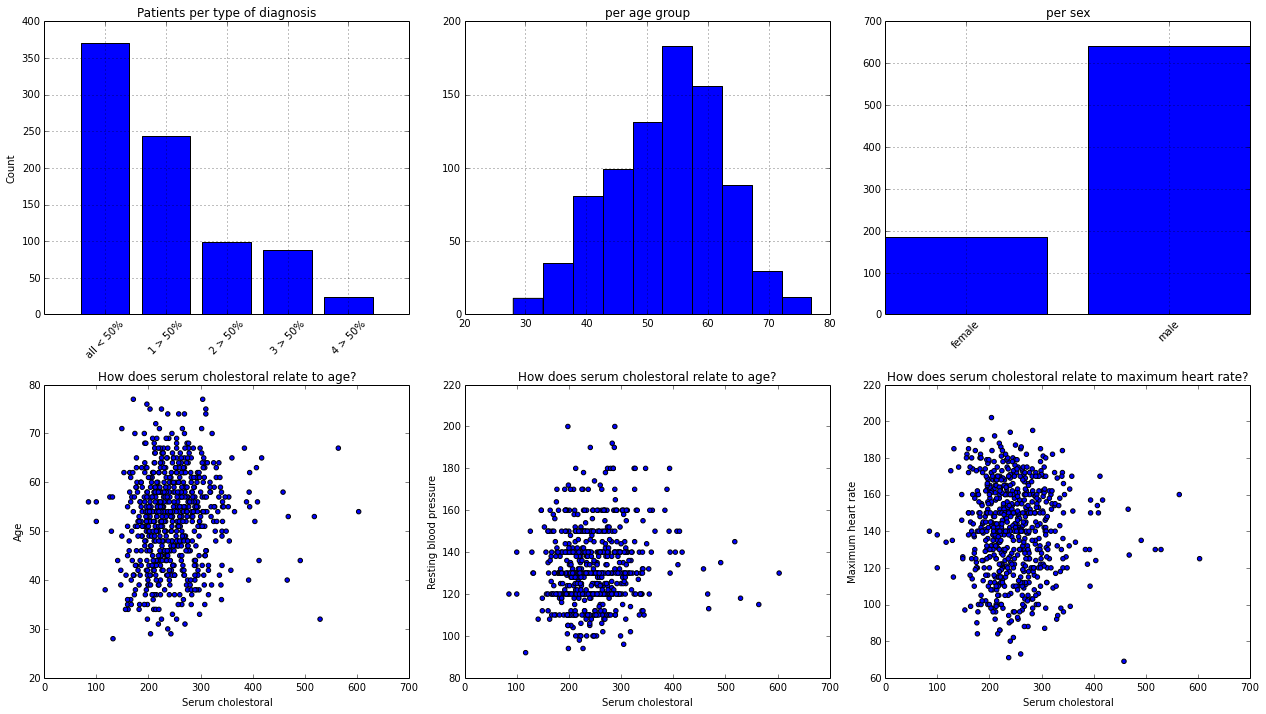

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(18)

plt.subplot(2,3,1)
plt.bar([0,1,2,3,4], df2.groupby('diagnosis').count().patient_id, align='center')
plt.xticks([0,1,2,3,4],['all < 50%','1 > 50%', '2 > 50%', '3 > 50%', '4 > 50%'], rotation=45)
plt.title('Patients per type of diagnosis')
plt.ylabel('Count')
plt.grid(True)

plt.subplot(2,3,2)
df2['age'].hist(bins=10)
plt.title('per age group')
plt.grid(True)

plt.subplot(2,3,3)
plt.bar([0,1], df2.groupby('sex').count().patient_id, align='center')
plt.xticks([0,1],['female','male'], rotation=45)
plt.title('per sex')
plt.grid(True)

plt.subplot(2,3,4)
plt.scatter(df2[df2.serum_cholestoral_Unknown<1].serum_cholestoral , df2[df2.serum_cholestoral_Unknown<1].age)
plt.title('How does serum cholestoral relate to age?')
plt.xlabel('Serum cholestoral')
plt.ylabel('Age')

plt.subplot(2,3,5)
plt.scatter(df2[df2.serum_cholestoral_Unknown<1].serum_cholestoral , df2[df2.serum_cholestoral_Unknown<1].resting_blood_pressure)
plt.title('How does serum cholestoral relate to age?')
plt.xlabel('Serum cholestoral')
plt.ylabel('Resting blood pressure')

plt.subplot(2,3,6)
plt.scatter(df2[df2.serum_cholestoral_Unknown<1].serum_cholestoral , df2[df2.serum_cholestoral_Unknown<1].maximum_heart_rate)
plt.title('How does serum cholestoral relate to maximum heart rate?')
plt.xlabel('Serum cholestoral')
plt.ylabel('Maximum heart rate')

plt.tight_layout() 

In [7]:
import statsmodels.formula.api as sm

XS = df2[df2.serum_cholestoral_Unknown<1][['resting_blood_pressure', 'maximum_heart_rate', 'age']]
XS['Ones'] = 1.0
YS = df2[df2.serum_cholestoral_Unknown<1][['serum_cholestoral']]

linmodel = sm.OLS(YS, XS).fit()
print linmodel.summary()

                            OLS Regression Results                            
Dep. Variable:      serum_cholestoral   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.868
Date:                Tue, 14 Apr 2015   Prob (F-statistic):             0.0358
Time:                        16:44:38   Log-Likelihood:                -3685.0
No. Observations:                 672   AIC:                             7378.
Df Residuals:                     668   BIC:                             7396.
Df Model:                           3                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
resting_blood_pressure     0.2399      0.132      1.817      0.070        -0.019     0.499
maximum_heart_ra

In [8]:
groups = df2[df2.serum_cholestoral_Unknown<1][['serum_cholestoral','diagnosis']].groupby('diagnosis')

q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
iqr = q3 - q1
upper = q2 + 1.5*iqr
lower = q2 - 1.5*iqr

def outliers(group):
    cat = group.name
    return group[(group.serum_cholestoral > upper.loc[cat][0]) | \
                 (group.serum_cholestoral < lower.loc[cat][0])]['serum_cholestoral']

out = groups.apply(outliers).dropna()

outx = []
outy = []
for cat in [0, 1, 2, 3, 4]:
    if not out.loc[cat].empty:
        for value in out[cat]:
            outx.append(str(cat))
            outy.append(value)
            
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper.serum_cholestoral = [min([x,y]) for (x,y) in zip(list(qmax.iloc[:,0]),upper.serum_cholestoral) ]
lower.serum_cholestoral = [max([x,y]) for (x,y) in zip(list(qmin.iloc[:,0]),lower.serum_cholestoral) ]

import csv
with open('boxes.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['diagnosis','upper','lower','q1','q2','q3','count'])
    rows = [['<50%','1>50%','2>50%','3>50%','4>50%']]
    rows.append(list(upper.serum_cholestoral))
    rows.append(list(lower.serum_cholestoral))
    rows.append(list(q1.serum_cholestoral))
    rows.append(list(q2.serum_cholestoral))
    rows.append(list(q3.serum_cholestoral))
    rows.append(list(groups.serum_cholestoral.count()))
    for row in map(list, zip(*rows)):
        writer.writerow(row)
        
with open('outliers.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['diagnosis','serum_cholestoral'])
    toutx = [{'0':'<50%','1':'1>50%','2':'2>50%','3':'3>50%','4':'4>50%'}[x] for x in outx]
    for row in map(list, zip(toutx, outy)):
        writer.writerow(row)

In [9]:
labels = [0, 1, 2, 3, 4]

df2 = df2[['age',
           'sex_female',
           'chest_pain_type_atyp_angina',
           'chest_pain_type_non_angina',
           'chest_pain_type_typ_angina',
           'resting_blood_pressure',
           'serum_cholestoral',
           'serum_cholestoral_Unknown',
           'fasting_blood_sugar_0.0',
           'fasting_blood_sugar_1.0',
           'resting_electrocardiographic_left_vent_hyper',
           'resting_electrocardiographic_normal',
           'resting_electrocardiographic_st_t_wave_abnormalit',
           'maximum_heart_rate',
           'exercise_induced_angina_1.0',
           'depression_induced_by_exercise',
           'slope_of_peak_exercise_down',
           'slope_of_peak_exercise_flat',
           'slope_of_peak_exercise_up',
           'n_vessels_colored_by_flourosopy_0.0',
           'n_vessels_colored_by_flourosopy_1.0',
           'n_vessels_colored_by_flourosopy_2.0',
           'n_vessels_colored_by_flourosopy_3.0',
           'thallium_defects_fixed_defect',
           'thallium_defects_normal',
           'thallium_defects_reversable_defe',
           'diagnosis']]

X1 = df2[df2.serum_cholestoral_Unknown<1].drop(['serum_cholestoral_Unknown','diagnosis'], axis=1)
print 'number of rows without unknown serum_cholestoral rows',  len(X1)
X2 = df2.drop(['serum_cholestoral','serum_cholestoral_Unknown','diagnosis'], axis=1)
print 'number of rows without serum_cholestoral feature',  len(X2)

y1 = df2[df2.serum_cholestoral_Unknown<1]['diagnosis'].apply(lambda x: x if x < len(labels)-1 else len(labels)-1)
y2 = df2['diagnosis'].apply(lambda x: x if x < len(labels)-1 else len(labels)-1)

number of rows without unknown serum_cholestoral rows 672
number of rows without serum_cholestoral feature 826


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [11]:
clf_list = [KNeighborsClassifier(n_neighbors=15), 
                LogisticRegression(C=100),
                DecisionTreeClassifier(min_samples_leaf=10), 
                ExtraTreesClassifier(),
                RandomForestClassifier(), 
                SVC(), 
                LinearSVC(), 
                GaussianNB(), 
                BernoulliNB(),
                MultinomialNB()]

for X,y in [(X1,y1), (X2,y2)]:
    X_minmax = MinMaxScaler().fit_transform(X)
    print '** classifier              precision  recall     f1         accuracy'
    for clf in clf_list:
        clf_label = str(clf)
        clf_label = clf_label[:clf_label.index('(')]
        print '   {0:23} {1:.3f}      {2:.3f}      {3:.3f}      {4:.3f}'.format(clf_label, 
                cross_val_score(clf, X_minmax, y, scoring='precision', cv=4).mean(), 
                cross_val_score(clf, X_minmax, y, scoring='recall', cv=4).mean(), 
                cross_val_score(clf, X_minmax, y, scoring='f1', cv=4).mean(), 
                cross_val_score(clf, X_minmax, y, cv=4).mean())

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will

** classifier              precision  recall     f1         accuracy
   KNeighborsClassifier    0.577      0.627      0.573      0.627

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sampl


   LogisticRegression      0.567      0.606      0.566      0.606
   DecisionTreeClassifier  0.536      0.523      0.508      0.520

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sampl


   ExtraTreesClassifier    0.583      0.576      0.552      0.570

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample


   RandomForestClassifier  0.544      0.570      0.560      0.586

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_


   SVC                     0.522      0.640      0.571      0.640

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_


   LinearSVC               0.577      0.624      0.582      0.624

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_


   GaussianNB              0.598      0.410      0.456      0.410

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sampl


   BernoulliNB             0.577      0.609      0.580      0.609

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sampl


   MultinomialNB           0.588      0.633      0.592      0.633

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sampl


** classifier              precision  recall     f1         accuracy
   KNeighborsClassifier    0.500      0.557      0.496      0.557

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sampl


   LogisticRegression      0.533      0.539      0.488      0.539

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sampl


   DecisionTreeClassifier  0.463      0.467      0.441      0.467

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sampl


   ExtraTreesClassifier    0.502      0.529      0.475      0.513

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_


   RandomForestClassifier  0.492      0.523      0.491      0.501

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_


   SVC                     0.446      0.581      0.498      0.581

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_


   LinearSVC               0.543      0.546      0.490      0.546

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_


   GaussianNB              0.516      0.362      0.373      0.362

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sampl


   BernoulliNB             0.533      0.539      0.497      0.539

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sampl


   MultinomialNB           0.525      0.560      0.505      0.560


/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sampl

###classifiers with the serum_cholestoral feature perform better

    precision high : when I say "sick", i am right => GaussianNB, LinearSVC, ExtraTreesClassifier 
    recall high : I do not miss sick people => SVC, LinearSVC, MultinomialNB, KNeighborsClassifier
    f1 => LinearSVC, MultinomialNB, SVC, LogisticRegression 
###we will continue with this feature and SVC, LinearSVC, MultinomialNB, LogisticRegression 

In [12]:
X=X1
y=y1

clf_list = [LogisticRegression(), SVC(), LinearSVC(), MultinomialNB()]

rs = StratifiedKFold(y, n_folds=4, shuffle=True, random_state=None)
train_index, test_index = iter(rs).next()
X_train = X.iloc[train_index,]
X_test = X.iloc[test_index,]
y_train = y.iloc[train_index]
y_test = y.iloc[test_index]

y_true = y_test

min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

for clf in clf_list:
    clf.fit(X_train_minmax, y_train)
    y_pred = clf.predict(X_test_minmax)
    clf_label = str(clf)
    clf_label = clf_label[:clf_label.index('(')]

    print '*'*(50-len(clf_label)), clf_label, '***'
    print '  ** Accuracy score %0.2f' % accuracy_score(y_true, y_pred)
    print '  ** Classification report\n', classification_report(y_test, y_pred)

******************************** LogisticRegression ***
  ** Accuracy score 0.66
  ** Classification report
             precision    recall  f1-score   support

          0       0.79      0.90      0.84        89
          1       0.49      0.62      0.55        47
          2       0.50      0.07      0.12        15
          3       0.38      0.20      0.26        15
          4       0.00      0.00      0.00         5

avg / total       0.62      0.66      0.62       171

*********************************************** SVC ***
  ** Accuracy score 0.63
  ** Classification report
             precision    recall  f1-score   support

          0       0.79      0.88      0.83        89
          1       0.42      0.64      0.50        47
          2       0.00      0.00      0.00        15
          3       0.00      0.00      0.00        15
          4       0.00      0.00      0.00         5

avg / total       0.52      0.63      0.57       171

************************************

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


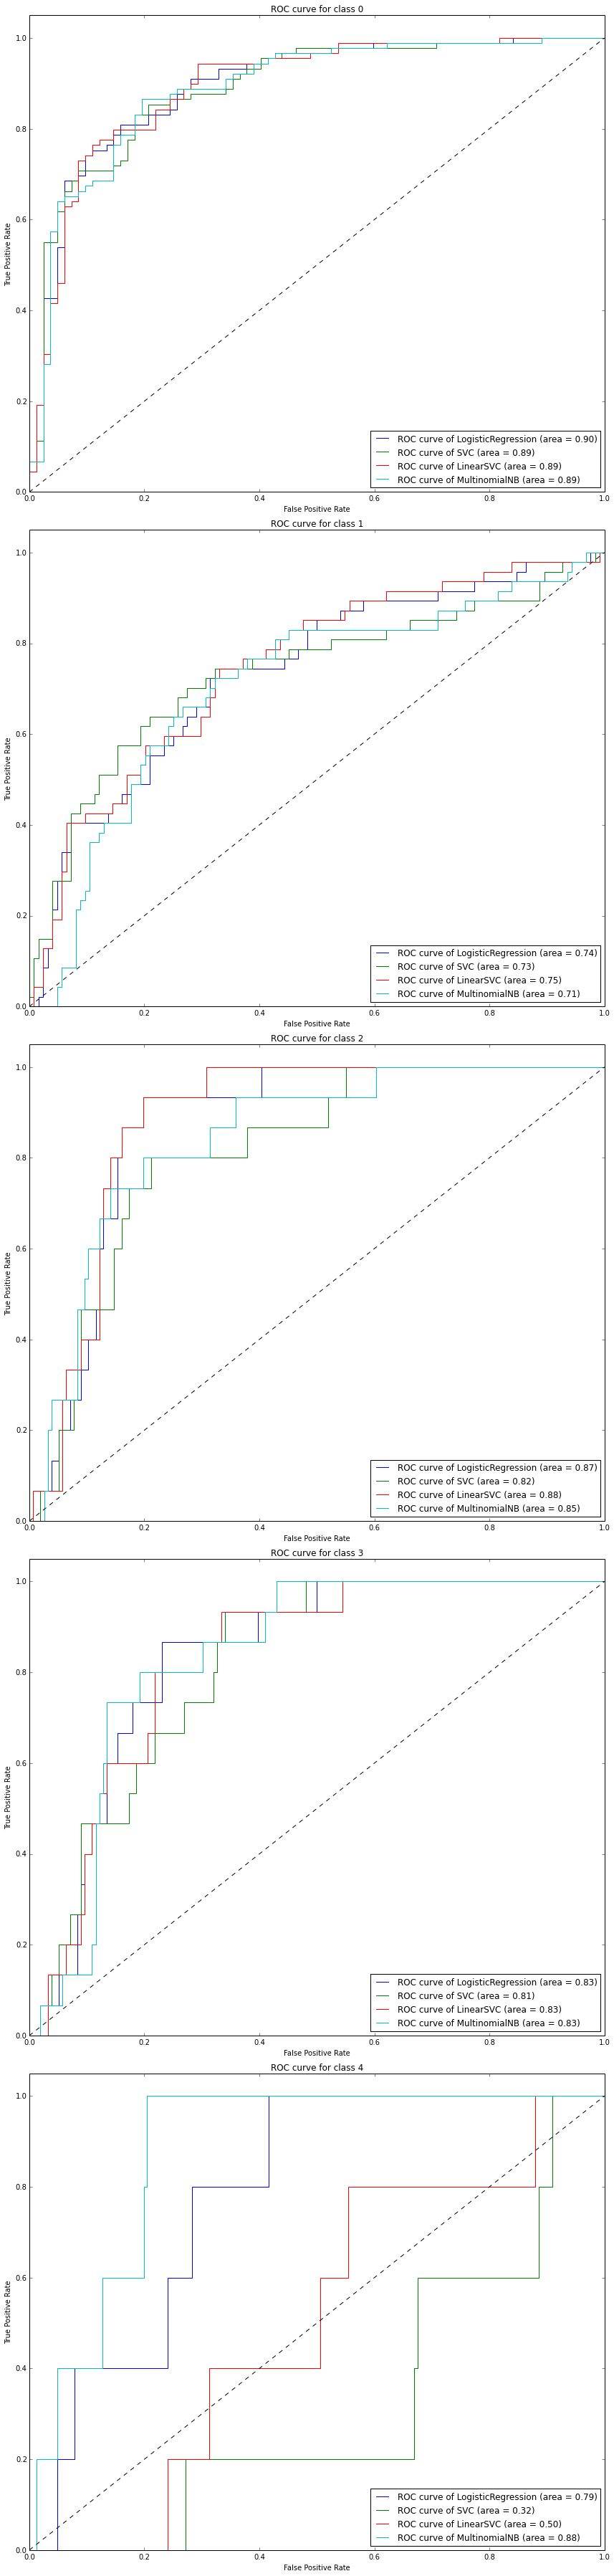

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

fig = plt.figure()
fig.set_figheight(50)
fig.set_figwidth(12)

ylb = label_binarize(y, classes=labels)
n_classes = ylb.shape[1]

rs = StratifiedKFold(y, n_folds=4, shuffle=True, random_state=None)
train_index, test_index = iter(rs).next()
X_train = X.iloc[train_index,]
X_test = X.iloc[test_index,]
y_train = ylb[train_index]
y_test = ylb[test_index]

X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

y_true = y_test

for n in range(n_classes):

    plt.subplot(5,1,n+1)

    for i, clf in enumerate(clf_list):
        
        ovrclf = OneVsRestClassifier(clf)
        ovrclf.fit(X_train_minmax, y_train)
        y_pred = ovrclf.predict(X_test_minmax)
    
        try:
            y_score = ovrclf.decision_function(X_test_minmax)
        except:
            y_score = ovrclf.predict_proba(X_test_minmax)
        
        # Compute ROC curve and ROC area for each class
        fpr, tpr, _ = roc_curve(y_true[:, n], y_score[:, n])
        roc_auc = auc(fpr, tpr)
    
        # Plot ROC curve
        clf_label = str(clf)
        clf_label = clf_label[:clf_label.index('(')]
        plt.plot(fpr, tpr, label='ROC curve of '+clf_label+' (area = {1:0.2f})'.format(clf_label, roc_auc))
        plt.legend(loc="lower right")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for class '+str(n))

plt.tight_layout()


micro-average ROC curve for LogisticRegression = 0.892650730139
micro-average ROC curve for SVC = 0.846200540337
micro-average ROC curve for LinearSVC = 0.886905372593
micro-average ROC curve for MultinomialNB = 0.884930405937


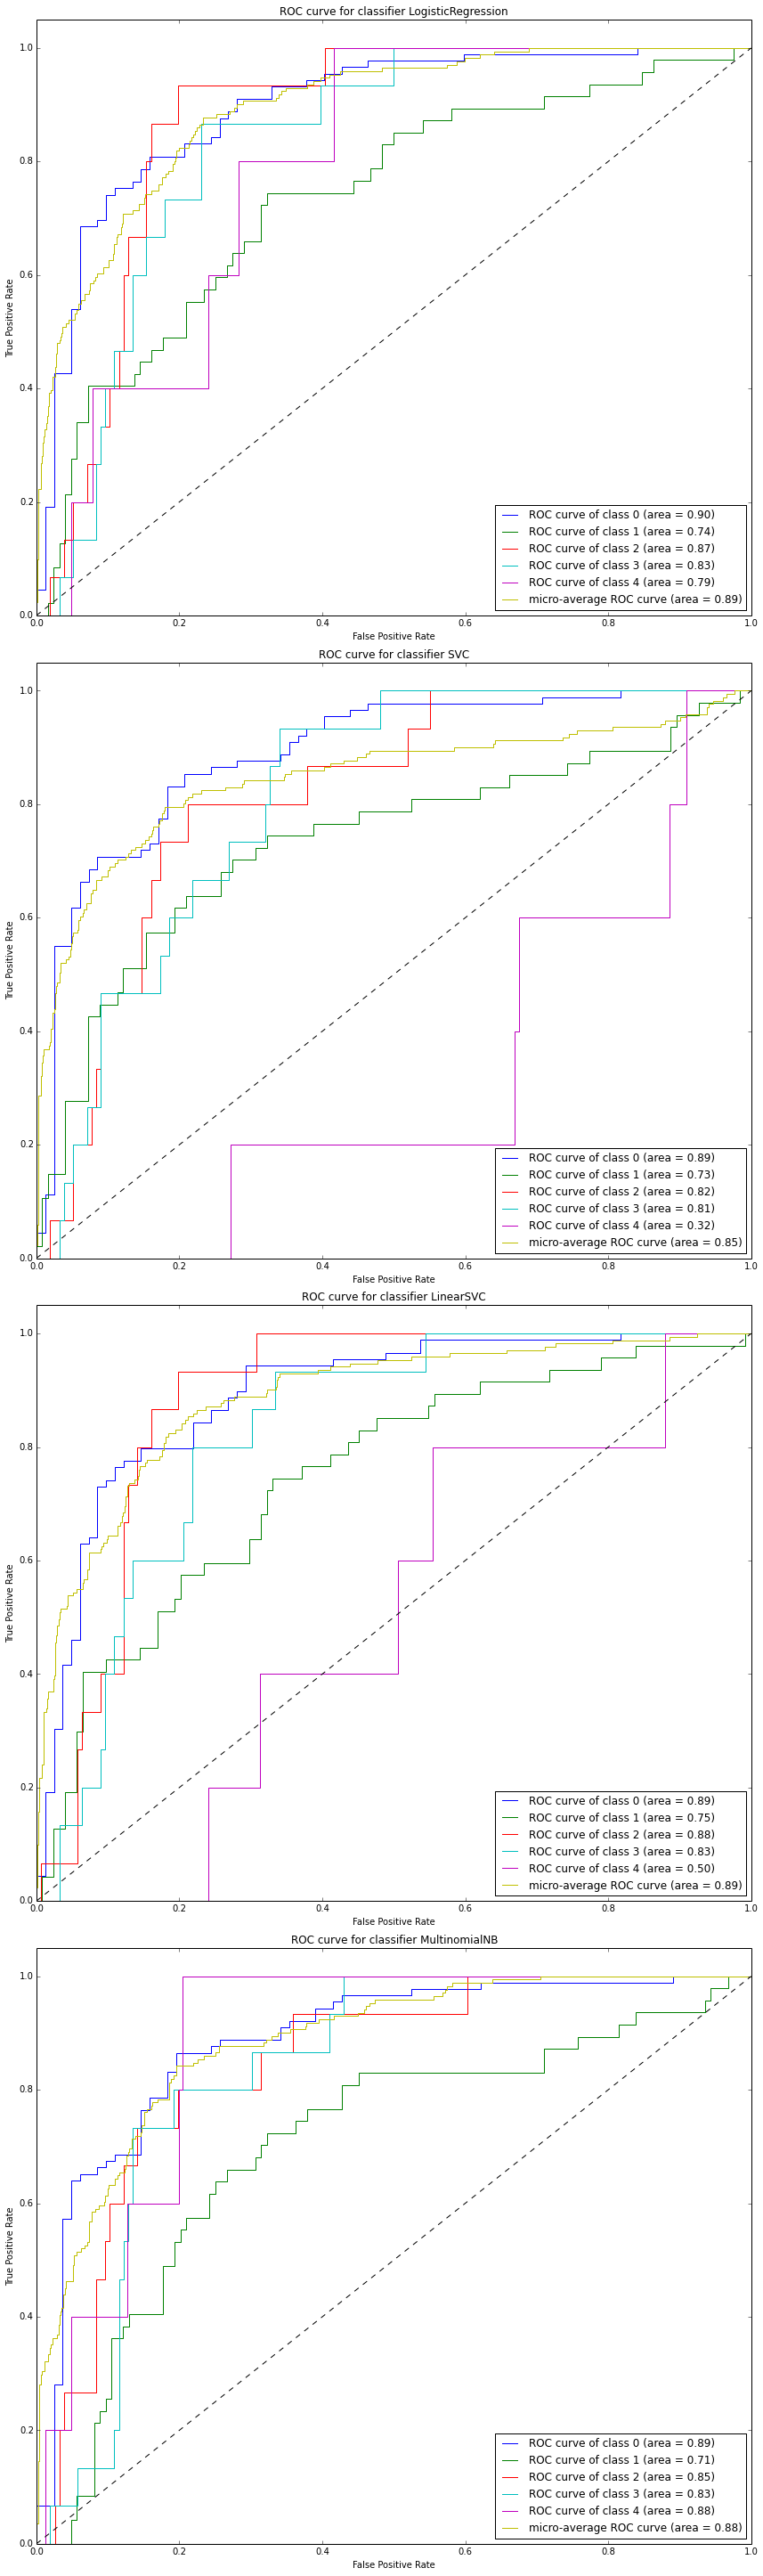

In [14]:
fig = plt.figure()
fig.set_figheight(100)
fig.set_figwidth(12)

for i, clf in enumerate(clf_list):

    clf_label = str(clf)
    clf_label = clf_label[:clf_label.index('(')]

    ovrclf = OneVsRestClassifier(clf)
    ovrclf.fit(X_train_minmax, y_train)
    y_pred = ovrclf.predict(X_test_minmax)
    
    try:
        y_score = ovrclf.decision_function(X_test_minmax)
    except:
        y_score = ovrclf.predict_proba(X_test_minmax)

    plt.subplot(10,1,i+1)

    for n in range(n_classes):
        
        # Compute ROC curve and ROC area for each class
        fpr, tpr, _ = roc_curve(y_true[:, n], y_score[:, n])
        roc_auc = auc(fpr, tpr)
    
        # Plot ROC curve
        plt.plot(fpr, tpr, label='ROC curve of class {0} (area = {1:0.2f})'.format(n, roc_auc))
        plt.legend(loc="lower right")
    
    fpr, tpr, _ = roc_curve(y_true.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc))
    plt.legend(loc="lower right")
    print 'micro-average ROC curve for', clf_label, '=', roc_auc
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for classifier '+ clf_label)
    

plt.tight_layout()

In [15]:
from sklearn.cross_validation import StratifiedKFold
from numpy import mean

from sklearn.neural_network import BernoulliRBM

def scores_by_classifier(X_new, y, clf_list=clf_list, title=True, rbm=True, minmax=True, lnc=35):
    
    if rbm:
        layer1 = BernoulliRBM(random_state=0)
        layer1.learning_rate = 0.05
        layer1.n_iter = 500
        layer1.n_components = lnc
    
    precision_dict = {}
    recall_dict = {}
    f1_dict = {}
    accuracy_dict = {}
    
    skf = StratifiedKFold(y, n_folds=4)

    if title:
        print 'classifier              precision  recall     f1         accuracy'

    for clf in clf_list:

        clf_label = str(clf)
        clf_label = clf_label[:clf_label.index('(')]

        if clf_label not in precision_dict:
            precision_dict[clf_label] = []
        if clf_label not in recall_dict:
            recall_dict[clf_label] = []
        if clf_label not in f1_dict:
            f1_dict[clf_label] = []
        if clf_label not in accuracy_dict:
            accuracy_dict[clf_label] = []


        for train_index, test_index in skf:
            X_train, X_test = X_new[train_index], X_new[test_index]
            y_train, y_test = y[train_index], y[test_index]

            if not minmax:
                X_train_minmax = X_train
                X_test_minmax = X_test
            else:
                X_train_minmax = min_max_scaler.fit_transform(X_train)
                X_test_minmax = min_max_scaler.transform(X_test)
            
            if not rbm:
                X_train2 = X_train_minmax 
                X_test2 = X_test_minmax 
            else:
                X_train2 = layer1.fit_transform(X_train_minmax)
                X_test2 = layer1.transform(X_test_minmax)

            clf.fit(X_train2, y_train)
            y_pred = clf.predict(X_test2)
            y_true = y_test

            precision_dict[clf_label].append(precision_score(y_true, y_pred))
            recall_dict[clf_label].append(recall_score(y_true, y_pred))
            f1_dict[clf_label].append(f1_score(y_true, y_pred))
            accuracy_dict[clf_label].append(accuracy_score(y_true, y_pred))

        print '{0:23} {1:.3f}      {2:.3f}      {3:.3f}      {4:.3f}'.format(clf_label, 
                                                                             mean(precision_dict[clf_label]), 
                                                                             mean(recall_dict[clf_label]), 
                                                                             mean(f1_dict[clf_label]), 
                                                                             mean(accuracy_dict[clf_label]))

In [19]:
scores_by_classifier(np.array(X), np.array(y), rbm=False)

classifier              precision  recall     f1         accuracy
LogisticRegression      0.568      0.615      0.569      0.615
SVC                     0.522      0.640      0.571      0.640
LinearSVC               0.576      0.622      0.581      0.622
MultinomialNB           0.587      0.632      0.591      0.632


In [20]:
scores_by_classifier(np.array(X), np.array(y), clf_list, rbm=True, lnc=35)

classifier              precision  recall     f1         accuracy
LogisticRegression      0.523      0.621      0.548      0.621
SVC                     0.516      0.620      0.538      0.620
LinearSVC               0.542      0.620      0.551      0.620
MultinomialNB           0.487      0.580      0.518      0.580


In [31]:
scores_by_classifier(np.array(X), np.array(y), clf_list, rbm=True, lnc=45)

classifier              precision  recall     f1         accuracy
LogisticRegression      0.545      0.639      0.582      0.639
SVC                     0.516      0.640      0.571      0.640
LinearSVC               0.573      0.640      0.589      0.640
MultinomialNB           0.566      0.633      0.588      0.633


In [18]:
clfetc = ExtraTreesClassifier()
X_new = clfetc.fit(X, y).transform(X)

scores_by_classifier(X_new, np.array(y), clf_list, rbm=False)
print '===== with BernoulliRBM'
scores_by_classifier(X_new, np.array(y), clf_list, rbm=True)

classifier              precision  recall     f1         accuracy
LogisticRegression      0.555      0.636      0.577      0.636
SVC                     0.505      0.616      0.552      0.616
LinearSVC               0.572      0.646      0.591      0.646
MultinomialNB           0.517      0.623      0.563      0.623
===== with BernoulliRBM
classifier              precision  recall     f1         accuracy
LogisticRegression      0.458      0.611      0.518      0.611
SVC                     0.462      0.602      0.516      0.602
LinearSVC               0.507      0.631      0.558      0.631
MultinomialNB           0.459      0.611      0.519      0.611


In [19]:
print '*** important features are: '
for i,j in enumerate(X.columns):
    if clfetc.feature_importances_[i] > 0.04:
        print j
        
from sklearn.tree import export_graphviz 
from StringIO import StringIO
from sklearn.externals.six import StringIO  
import pydot

clf = DecisionTreeClassifier(min_samples_leaf=10)

clf = clf.fit(X_new, y)
out = StringIO()
export_graphviz(clf, out_file=out, feature_names=X.columns)
graph = pydot.graph_from_dot_data(out.getvalue()) 
graph.write_pdf("mcnulty-tree.pdf") 

*** important features are: 
age
chest_pain_type_atyp_angina
chest_pain_type_non_angina
resting_blood_pressure
serum_cholestoral
maximum_heart_rate
exercise_induced_angina_1.0
depression_induced_by_exercise
slope_of_peak_exercise_flat


True

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

for k in range(3):
    clfkb = SelectKBest(chi2, k=k*3+5)
    clfkb.fit(X, y)
    X_new = clfkb.transform(X)
    scores_by_classifier(X_new, np.array(y), [SVC()], title=False)

SVC                     0.278      0.527      0.364      0.527
SVC                     0.455      0.583      0.500      0.583
SVC                     0.452      0.590      0.504      0.590


In [21]:
import numpy as np
import neurolab as nl

ylb = label_binarize(y, classes=labels)

rs = StratifiedKFold(y, n_folds=4, shuffle=True, random_state=None)
train_index, test_index = iter(rs).next()
X_train = X.iloc[train_index,]
X_test = X.iloc[test_index,]
y_train = ylb[train_index]
y_test = ylb[test_index]

net_array = map(list, zip(np.array(X.min()), np.array(X.max())))

input = X_train
target = y_train
net = nl.net.newff(net_array, [25,25,len(labels)])

In [ ]:
err = net.train(input, target, epochs=1500, show=25, goal=0.01) 

In [ ]:
y_neuro = net.sim(X_test)
y_pred = []
for i in y_neuro:
    ii = [1 if x==max(i) else 0 for x in i]
    y_pred.append(ii)
y_pred = np.asarray(y_pred)

print '   accuracy score:', accuracy_score(y_test, y_pred)
print '   classification report:\n', classification_report(y_test, y_pred)

In [ ]:
y_neuro = net.sim(X_train)
y_pred = []
for i in y_neuro:
    ii = [1 if x==max(i) else 0 for x in i]
    y_pred.append(ii)
y_pred = np.asarray(y_pred)

print '   accuracy score:', accuracy_score(y_train, y_pred)
print '   classification report:\n', classification_report(y_train, y_pred)

In [ ]:
X01 = df2[df2.serum_cholestoral_Unknown<1].drop(['serum_cholestoral_Unknown','diagnosis'], axis=1)
X02 = df2.drop(['serum_cholestoral','serum_cholestoral_Unknown','diagnosis'], axis=1)

y01 = df2[df2.serum_cholestoral_Unknown<1]['diagnosis'].apply(lambda x: x if x < 1 else 1)
y02 = df2['diagnosis'].apply(lambda x: x if x < 1 else 1)

In [ ]:
X = X01
y = y01

scores_by_classifier(np.array(X), np.array(y), rbm=False)

In [ ]:
scores_by_classifier(np.array(X), np.array(y), clf_list, rbm=True, lnc=35)

In [ ]:
clfetc = ExtraTreesClassifier()
X_new = clfetc.fit(X, y).transform(X)

scores_by_classifier(X_new, np.array(y), clf_list, rbm=False)

In [ ]:
rs = StratifiedKFold(y, n_folds=4, shuffle=True, random_state=None)
train_index, test_index = iter(rs).next()
X_train = X.iloc[train_index,]
X_test = X.iloc[test_index,]
y_train = np.array(y.iloc[train_index]).reshape(len(train_index),1)
y_test = np.array(y.iloc[test_index]).reshape(len(test_index),1)

net_array = map(list, zip(np.array(X.min()), np.array(X.max())))

input = X_train
target = y_train
net = nl.net.newff(net_array, [45,45,1])

In [ ]:
err = net.train(input, target, epochs=250, show=25, goal=0.001) 

In [ ]:
y_neuro = net.sim(X_test)
y_pred = [1 if x > 0.5 else 0 for x in y_neuro]

print 'accuracy score:', accuracy_score(y_test, y_pred)
print 'precision score:', precision_score(y_test, y_pred)
print 'recall score:', recall_score(y_test, y_pred)
print 'f1 score:', f1_score(y_test, y_pred)

In [ ]:
X = X02
y = y02

scores_by_classifier(np.array(X), np.array(y), rbm=False)

In [ ]:
rs = StratifiedKFold(y, n_folds=4, shuffle=True, random_state=None)
train_index, test_index = iter(rs).next()
X_train = X.iloc[train_index,]
X_test = X.iloc[test_index,]
y_train = np.array(y.iloc[train_index]).reshape(len(train_index),1)
y_test = np.array(y.iloc[test_index]).reshape(len(test_index),1)

net_array = map(list, zip(np.array(X.min()), np.array(X.max())))

input = X_train
target = y_train
net = nl.net.newff(net_array, [45,45,1])

err = net.train(input, target, epochs=250, show=25, goal=0.01) 

y_neuro = net.sim(X_test)
y_pred = [1 if x > 0.5 else 0 for x in y_neuro]

print 'accuracy score:', accuracy_score(y_test, y_pred)
print 'precision score:', precision_score(y_test, y_pred)
print 'recall score:', recall_score(y_test, y_pred)
print 'f1 score:', f1_score(y_test, y_pred)

In [ ]:
y_neuro = net.sim(X_test)
y_pred = [1 if x > -.25 else 0 for x in y_neuro]

print 'accuracy score:', accuracy_score(y_test, y_pred)
print 'precision score:', precision_score(y_test, y_pred)
print 'recall score:', recall_score(y_test, y_pred)
print 'f1 score:', f1_score(y_test, y_pred)

In [ ]:
y_neuro = net.sim(X.iloc[3,].reshape(1,len(X.iloc[3,])))

In [ ]:
X.iloc[3,].reshape(1,len(X.iloc[3,])).shape[1]

In [ ]:
y_pred = [1 if x > -.25 else 0 for x in y_neuro]

In [ ]:
y_pred

In [ ]:
y_neuro = net.sim(np.matrix(X.iloc[3,]))

In [ ]:
np.matrix([1,3]).shape

In [ ]:
np.matrix(X01.iloc[9,])

In [ ]:
data = {"example":[37,0,0,1,0,130,1,0,0,1,0,187,0,3.5,1,0,0,1,0,0,0,0,1,0] }
print data

In [ ]:
x = np.matrix(data["example"])
y_neuro = net.sim(x)
score = [1 if x > 0.5 else 0 for x in y_neuro]
results = {"score": score[0]}
print results
#    return flask.jsonify(results)



curl 104.236.210.9/score -X POST -H 'Content-Type: application/json' -d '{"example": 53,0,0,0,0,140,203,0,1,1,0,0,155,1,3.1,1,0,0,1,0,0,0,0,0,1]}'

curl 104.236.210.9/score -X POST -H 'Content-Type: application/json' -d '{"example": [37,0,0,1,0,130,250,1,0,0,1,0,187,0,3.5,1,0,0,1,0,0,0,0,1,0]}'